In [1]:
import numpy as np
import matplotlib.pyplot as plt

# in g
masses = [4.1, 14.0, 31.7]

# in m
ball_1_heights = [0.25, 0.5, 1.0, 1.5, 2.0]
ball_2_heights = [0.5, 1.0, 1.5, 2.0]
ball_3_heights = [1.5, 2.0]

# in cm
ball_1_crater_d = [
    [3.170, 2.880, 2.870, 3.635, 2.965],
    [3.760, 3.845, 3.810, 3.580, 3.665],
    [4.310, 3.910, 4.220, 4.350, 4.060],
    [4.625, 4.510, 4.430, 4.615, 4.550],
    [4.760, 4.875, 4.365, 4.575, 4.880],
]

# in cm
ball_2_crater_d = [
    [4.760, 4.750, 4.920, 4.930, 5.120],
    [5.265, 5.270, 5.380, 5.800, 5.600],
    [6.210, 6.055, 6.355, 6.155, 6.225],
    [6.995, 6.890, 6.885, 6.610, 6.775],
]

# in cm
ball_3_crater_d = [
    [7.310, 7.440, 7.460, 7.375, 7.175],
    [7.980, 7.525, 8.035, 8.040, 7.700],
]

# Convert crater diameters from cm to m
ball_1_crater_d = np.array(ball_1_crater_d) / 100
ball_2_crater_d = np.array(ball_2_crater_d) / 100
ball_3_crater_d = np.array(ball_3_crater_d) / 100

# Convert masses from g to kg
masses = np.array(masses) / 1000

print("Ball 1 crater diameters [m]:")
print(ball_1_crater_d)
print()

print("Ball 2 crater diameters [m]:")
print(ball_2_crater_d)
print()

print("Ball 3 crater diameters [m]:")
print(ball_3_crater_d)
print()

print("Masses [kg]:")
print(masses)
print()


# Calculate average crater diameters for each ball
ball_1_crater_d_avg = np.mean(ball_1_crater_d, axis=1)
ball_2_crater_d_avg = np.mean(ball_2_crater_d, axis=1)
ball_3_crater_d_avg = np.mean(ball_3_crater_d, axis=1)

print("Crater diameters averages:")
print(ball_1_crater_d_avg)
print(ball_2_crater_d_avg)
print(ball_3_crater_d_avg)
print()


ball_1_energy = [float(masses[0] * 9.81 * height) for height in ball_1_heights]
ball_2_energy = [float(masses[1] * 9.81 * height) for height in ball_2_heights]
ball_3_energy = [float(masses[2] * 9.81 * height) for height in ball_3_heights]

print("Ball potential energy:")
print(ball_1_energy)
print(ball_2_energy)
print(ball_3_energy)

ball_1_energy_diameters = list(zip(ball_1_energy, ball_1_crater_d_avg))
ball_2_energy_diameters = list(zip(ball_2_energy, ball_2_crater_d_avg))
ball_3_energy_diameters = list(zip(ball_3_energy, ball_3_crater_d_avg))

all_ball_energy_diameters = [
    *ball_1_energy_diameters,
    *ball_2_energy_diameters,
    *ball_3_energy_diameters,
]


# Extract energies and diameters for plotting
energies = [pair[0] for pair in all_ball_energy_diameters]
diameters = [pair[1] for pair in all_ball_energy_diameters]

Ball 1 crater diameters [m]:
[[0.0317  0.0288  0.0287  0.03635 0.02965]
 [0.0376  0.03845 0.0381  0.0358  0.03665]
 [0.0431  0.0391  0.0422  0.0435  0.0406 ]
 [0.04625 0.0451  0.0443  0.04615 0.0455 ]
 [0.0476  0.04875 0.04365 0.04575 0.0488 ]]

Ball 2 crater diameters [m]:
[[0.0476  0.0475  0.0492  0.0493  0.0512 ]
 [0.05265 0.0527  0.0538  0.058   0.056  ]
 [0.0621  0.06055 0.06355 0.06155 0.06225]
 [0.06995 0.0689  0.06885 0.0661  0.06775]]

Ball 3 crater diameters [m]:
[[0.0731  0.0744  0.0746  0.07375 0.07175]
 [0.0798  0.07525 0.08035 0.0804  0.077  ]]

Masses [kg]:
[0.0041 0.014  0.0317]

Crater diameters averages:
[0.03104 0.03732 0.0417  0.04546 0.04691]
[0.04896 0.05463 0.062   0.06831]
[0.07352 0.07856]

Ball potential energy:
[0.01005525, 0.0201105, 0.040221, 0.060331499999999996, 0.080442]
[0.06867000000000001, 0.13734000000000002, 0.20601000000000003, 0.27468000000000004]
[0.4664655, 0.621954]



slope 4.36939927718574
intercept 4.609676366046677

Final energy-diameter relationship:
E(d) = 4.07e+04 * d^4.37 [J]
E(d)= 10^4.61 * d^4.37 [J]


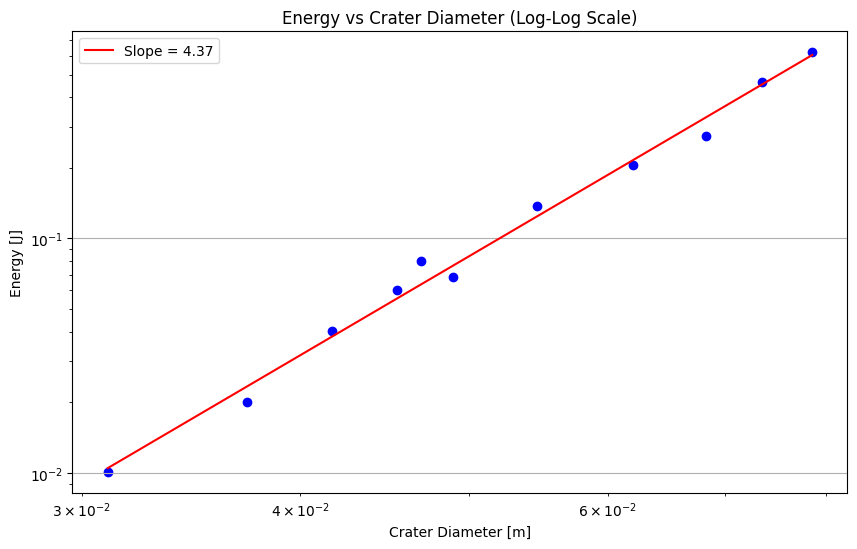

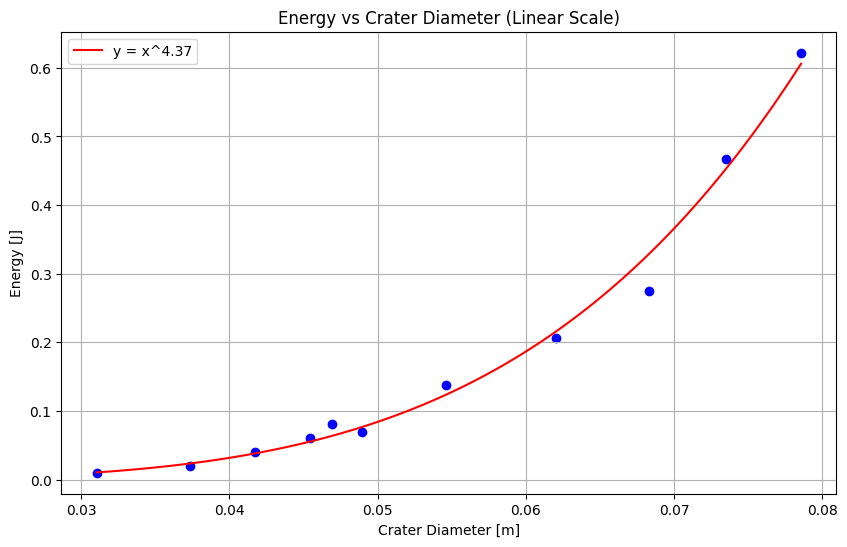

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(diameters, energies, c="blue", marker="o")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Crater Diameter [m]")
plt.ylabel("Energy [J]")
plt.title("Energy vs Crater Diameter (Log-Log Scale)")
plt.grid(True)

log_energies = np.log10(energies)
log_diameters = np.log10(diameters)

slope, intercept = np.polyfit(log_diameters, log_energies, 1)

x_reg = np.linspace(min(log_diameters), max(log_diameters), 100)
y_reg = slope * x_reg + intercept


print()
print("slope", slope)
print("intercept", intercept)

plt.plot(10**x_reg, 10**y_reg, "r-", label=f"Slope = {slope:.2f}")
plt.legend()


plt.figure(figsize=(10, 6))
plt.scatter(diameters, energies, c="blue", marker="o")
plt.xlabel("Crater Diameter [m]")
plt.ylabel("Energy [J]")
plt.title("Energy vs Crater Diameter (Linear Scale)")
plt.grid(True)

x_linear = np.linspace(min(diameters), max(diameters), 100)
y_linear = (10**intercept) * x_linear**slope

plt.plot(x_linear, y_linear, "r-", label=f"y = x^{slope:.2f}")
plt.legend()

print("\nFinal energy-diameter relationship:")

print(f"E(d)= 10^{intercept:.4f} * d^{slope:.4f} [J]")
print(f"E(d) = {10**intercept:.4e} * d^{slope:.4f} [J]")